In [ ]:
# prompt: download this dataset https://www.kaggle.com/datasets/Cornell-University/arxiv

!pip install kaggle

# Assuming you have your kaggle.json in the correct location as per Kaggle's instructions.
# If not, upload it to the environment.
# In Colab, this would be by clicking the folder icon on the left, and uploading the file.

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d Cornell-University/arxiv

# Unzip the downloaded dataset (adjust the filename if needed)
!unzip arxiv.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/Cornell-University/arxiv
License(s): CC0-1.0
 99% 1.33G/1.35G [00:15<00:00, 103MB/s] 
100% 1.35G/1.35G [00:15<00:00, 91.6MB/s]
Archive:  arxiv.zip
  inflating: arxiv-metadata-oai-snapshot.json  


In [ ]:
import json
arxiv_json = []
with open("/content/arxiv-metadata-oai-snapshot.json", "r") as f:
    for line in f:
        arxiv_json.append(json.loads(line))

Processed 10000 lines
Processed 20000 lines
Processed 30000 lines
Processed 40000 lines
Processed 50000 lines
Processed 60000 lines
Processed 70000 lines
Processed 80000 lines
Processed 90000 lines
Processed 100000 lines
Processed 110000 lines
Processed 120000 lines
Processed 130000 lines
Processed 140000 lines
Processed 150000 lines
Processed 160000 lines
Processed 170000 lines
Processed 180000 lines
Processed 190000 lines
Processed 200000 lines
Processed 210000 lines
Processed 220000 lines
Processed 230000 lines
Processed 240000 lines
Processed 250000 lines
Processed 260000 lines
Processed 270000 lines
Processed 280000 lines
Processed 290000 lines
Processed 300000 lines
Processed 310000 lines
Processed 320000 lines
Processed 330000 lines
Processed 340000 lines
Processed 350000 lines
Processed 360000 lines
Processed 370000 lines
Processed 380000 lines
Processed 390000 lines
Processed 400000 lines
Processed 410000 lines
Processed 420000 lines
Processed 430000 lines
Processed 440000 lin

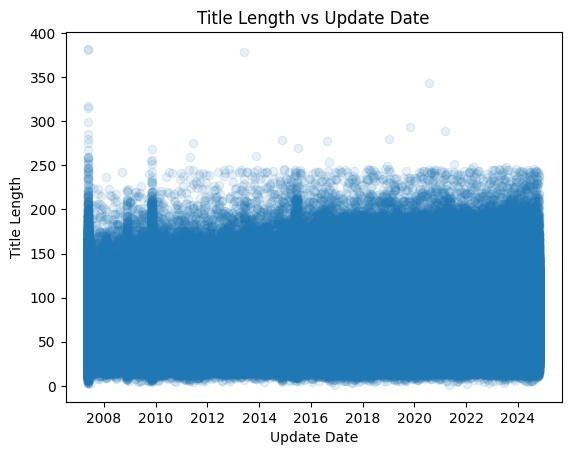

In [ ]:
import json
from datetime import datetime
import pandas as pd

titles_lengths = []
update_dates = []
count = 0

with open("/content/arxiv-metadata-oai-snapshot.json", "r") as f:
    for line in f:
        count += 1
        if count % 10000 == 0:
            print(f"Processed {count} lines")
        paper = json.loads(line)
        len_title = len(paper['title'])
        titles_lengths.append(len_title)

        update_dates.append(datetime.strptime(paper['update_date'], '%Y-%m-%d'))

# Create a DataFrame with just these two columns
df = pd.DataFrame({
    'title_length': titles_lengths,
    'update_date': update_dates
})

# Now you can analyze correlation
correlation = df['title_length'].corr(df['update_date'].astype(int) / 10**9)
print(f"Correlation between title length and update date: {correlation}")

# Optional: You can also create visualizations
import matplotlib.pyplot as plt
plt.scatter(df['update_date'], df['title_length'], alpha=0.1)
plt.xlabel('Update Date')
plt.ylabel('Title Length')
plt.title('Title Length vs Update Date')
plt.show()

In [ ]:
df['year'] = df['update_date'].dt.year
print(df.head())

   title_length update_date  year
0            87  2008-11-26  2008
1            40  2008-12-13  2008
2            83  2008-01-13  2008
3            89  2007-05-23  2007
4            52  2013-10-15  2013


Correlation between title length and update date: 0.1397552645867982


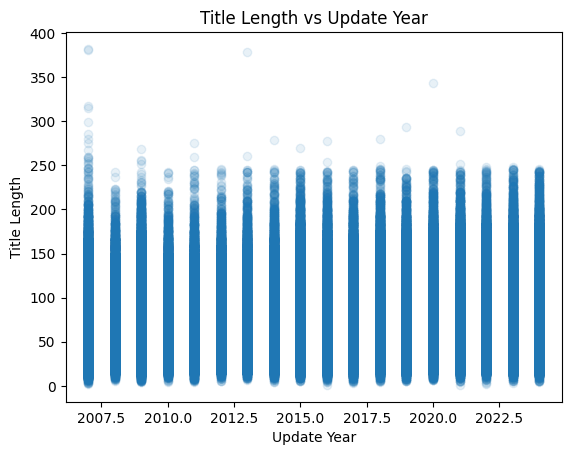

In [ ]:
correlation = df['title_length'].corr(df['year'])
print(f"Correlation between title length and update date: {correlation}")

import matplotlib.pyplot as plt
plt.scatter(df['year'], df['title_length'], alpha=0.1)
plt.xlabel('Update Year')
plt.ylabel('Title Length')
plt.title('Title Length vs Update Year')
plt.show()

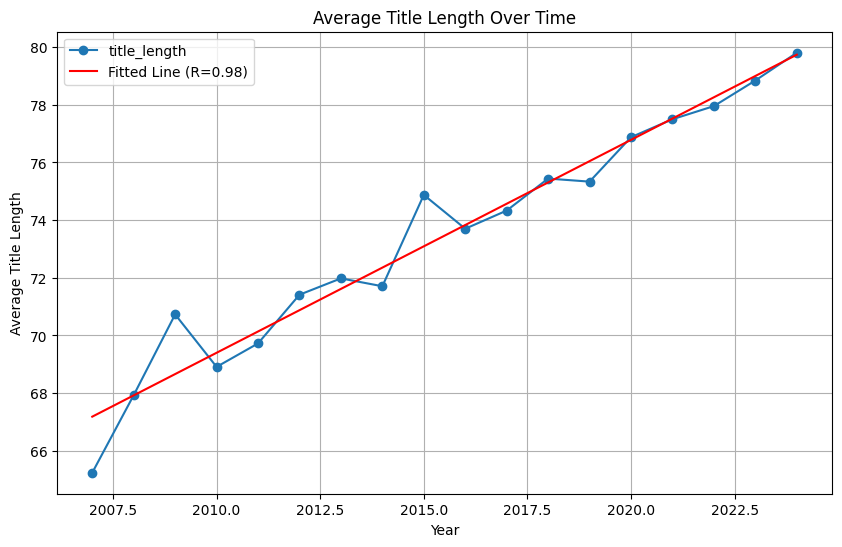

In [ ]:
import json
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

average_title_length_by_year = df.groupby('year')['title_length'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
average_title_length_by_year.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Average Title Length')
plt.title('Average Title Length Over Time')

x = average_title_length_by_year.index.values
y = average_title_length_by_year.values

slope, intercept, r_value, p_value, std_err = linregress(x, y)

fitted_line = slope * x + intercept

plt.plot(x, fitted_line, color='red', label=f"Fitted Line (R={r_value:.2f})")

plt.legend()
plt.grid(True)
plt.show()

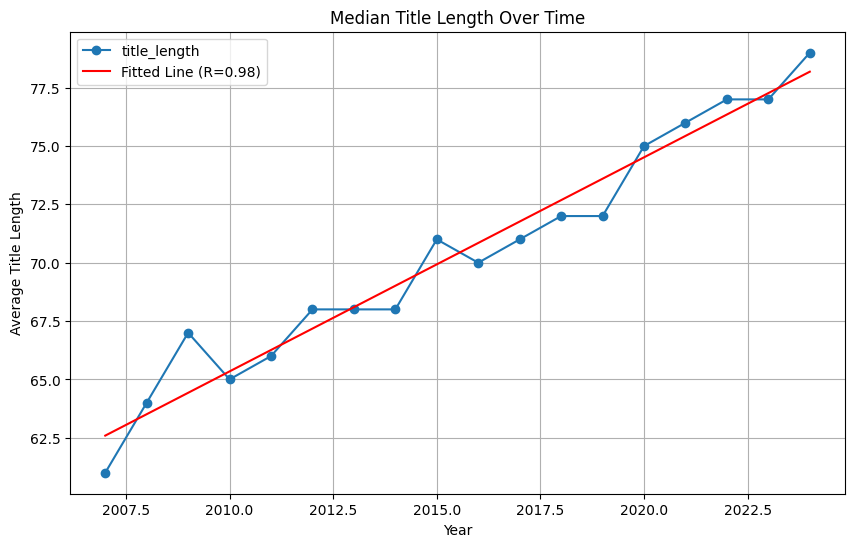

In [ ]:
average_title_length_by_year = df.groupby('year')['title_length'].median()

# Create the plot
plt.figure(figsize=(10, 6))
average_title_length_by_year.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Average Title Length')
plt.title('Median Title Length Over Time')

x = average_title_length_by_year.index.values
y = average_title_length_by_year.values

slope, intercept, r_value, p_value, std_err = linregress(x, y)

fitted_line = slope * x + intercept

plt.plot(x, fitted_line, color='red', label=f"Fitted Line (R={r_value:.2f})")

plt.legend()
plt.grid(True)
plt.show()

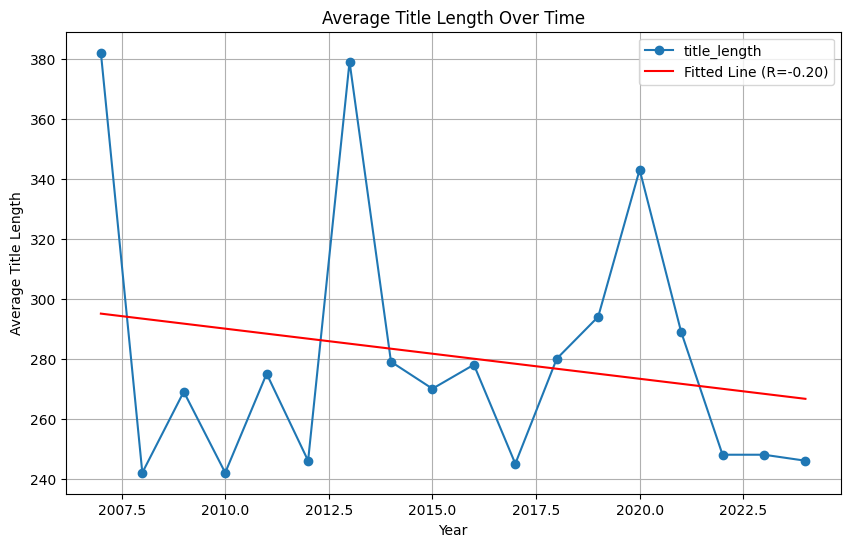

In [ ]:
average_title_length_by_year = df.groupby('year')['title_length'].max()

# Create the plot
plt.figure(figsize=(10, 6))
average_title_length_by_year.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Average Title Length')
plt.title('Median Title Length Over Time')

x = average_title_length_by_year.index.values
y = average_title_length_by_year.values

slope, intercept, r_value, p_value, std_err = linregress(x, y)

fitted_line = slope * x + intercept

plt.plot(x, fitted_line, color='red', label=f"Fitted Line (R={r_value:.2f})")

plt.legend()
plt.grid(True)
plt.show()

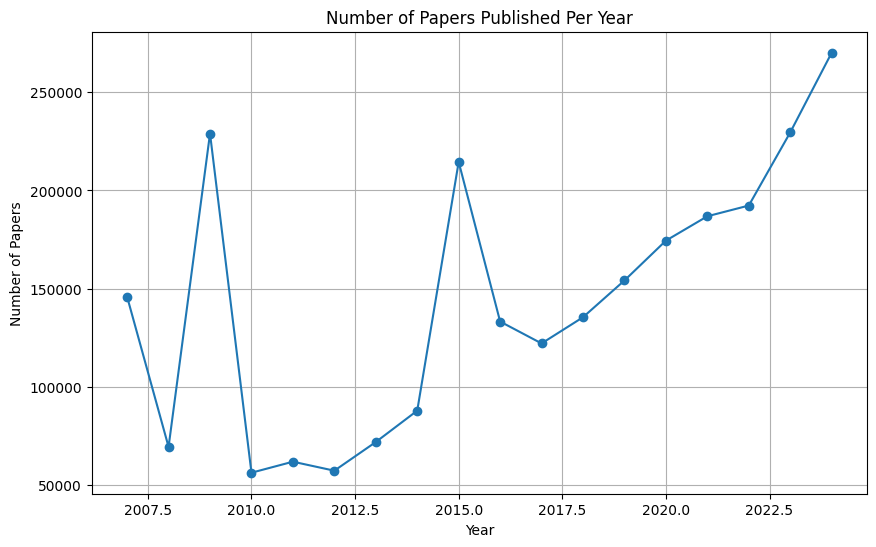

In [ ]:
papers_per_year = df.groupby('year').size()

# Create the plot
plt.figure(figsize=(10, 6))
papers_per_year.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title('Number of Papers Published Per Year')
plt.grid(True)
plt.show()

2010-2012 seems weird, maybe related to arxiv updating from sole cornell management or post 2008 crisis?

In [ ]:
num_authors = []
titles = []
abstract_lengths = []
count = 0

with open("/content/arxiv-metadata-oai-snapshot.json", "r") as f:
    for line in f:
        count += 1
        if count % 10000 == 0:
            print(f"Processed {count} lines")
        paper = json.loads(line)

        try:
            num_authors.append(len(paper['authors'].split(',')))
        except (KeyError, AttributeError):
            num_authors.append(0)

        titles.append(paper['title'])

        try:
          abstract_lengths.append(len(paper['abstract']))
        except (KeyError, AttributeError):
          abstract_lengths.append(0)


# Add new columns to the DataFrame
df['num_authors'] = num_authors
df['title'] = titles
df['abstract_length'] = abstract_lengths


# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(df['update_date'], df['num_authors'])
plt.xlabel('Update Date')
plt.ylabel('Number of Authors')
plt.title('Number of Authors Over Time')

plt.subplot(3, 1, 2)
plt.plot(df['update_date'], df['title_length'])
plt.xlabel('Update Date')
plt.ylabel('Title Length')
plt.title('Title Length Over Time')

plt.subplot(3, 1, 3)
plt.plot(df['update_date'], df['abstract_length'])
plt.xlabel('Update Date')
plt.ylabel('Abstract Length')
plt.title('Abstract Length Over Time')

plt.tight_layout()
plt.show()

Processed 10000 lines
Processed 20000 lines
Processed 30000 lines
Processed 40000 lines
Processed 50000 lines
Processed 60000 lines
Processed 70000 lines
Processed 80000 lines
Processed 90000 lines
Processed 100000 lines
Processed 110000 lines
Processed 120000 lines
Processed 130000 lines
Processed 140000 lines
Processed 150000 lines
Processed 160000 lines
Processed 170000 lines
Processed 180000 lines
Processed 190000 lines
Processed 200000 lines
Processed 210000 lines
Processed 220000 lines
Processed 230000 lines
Processed 240000 lines
Processed 250000 lines
Processed 260000 lines
Processed 270000 lines
Processed 280000 lines
Processed 290000 lines
Processed 300000 lines
Processed 310000 lines
Processed 320000 lines
Processed 330000 lines
Processed 340000 lines
Processed 350000 lines
Processed 360000 lines
Processed 370000 lines
Processed 380000 lines
Processed 390000 lines
Processed 400000 lines
Processed 410000 lines
Processed 420000 lines
Processed 430000 lines
Processed 440000 lin

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 1200x600 with 3 Axes>

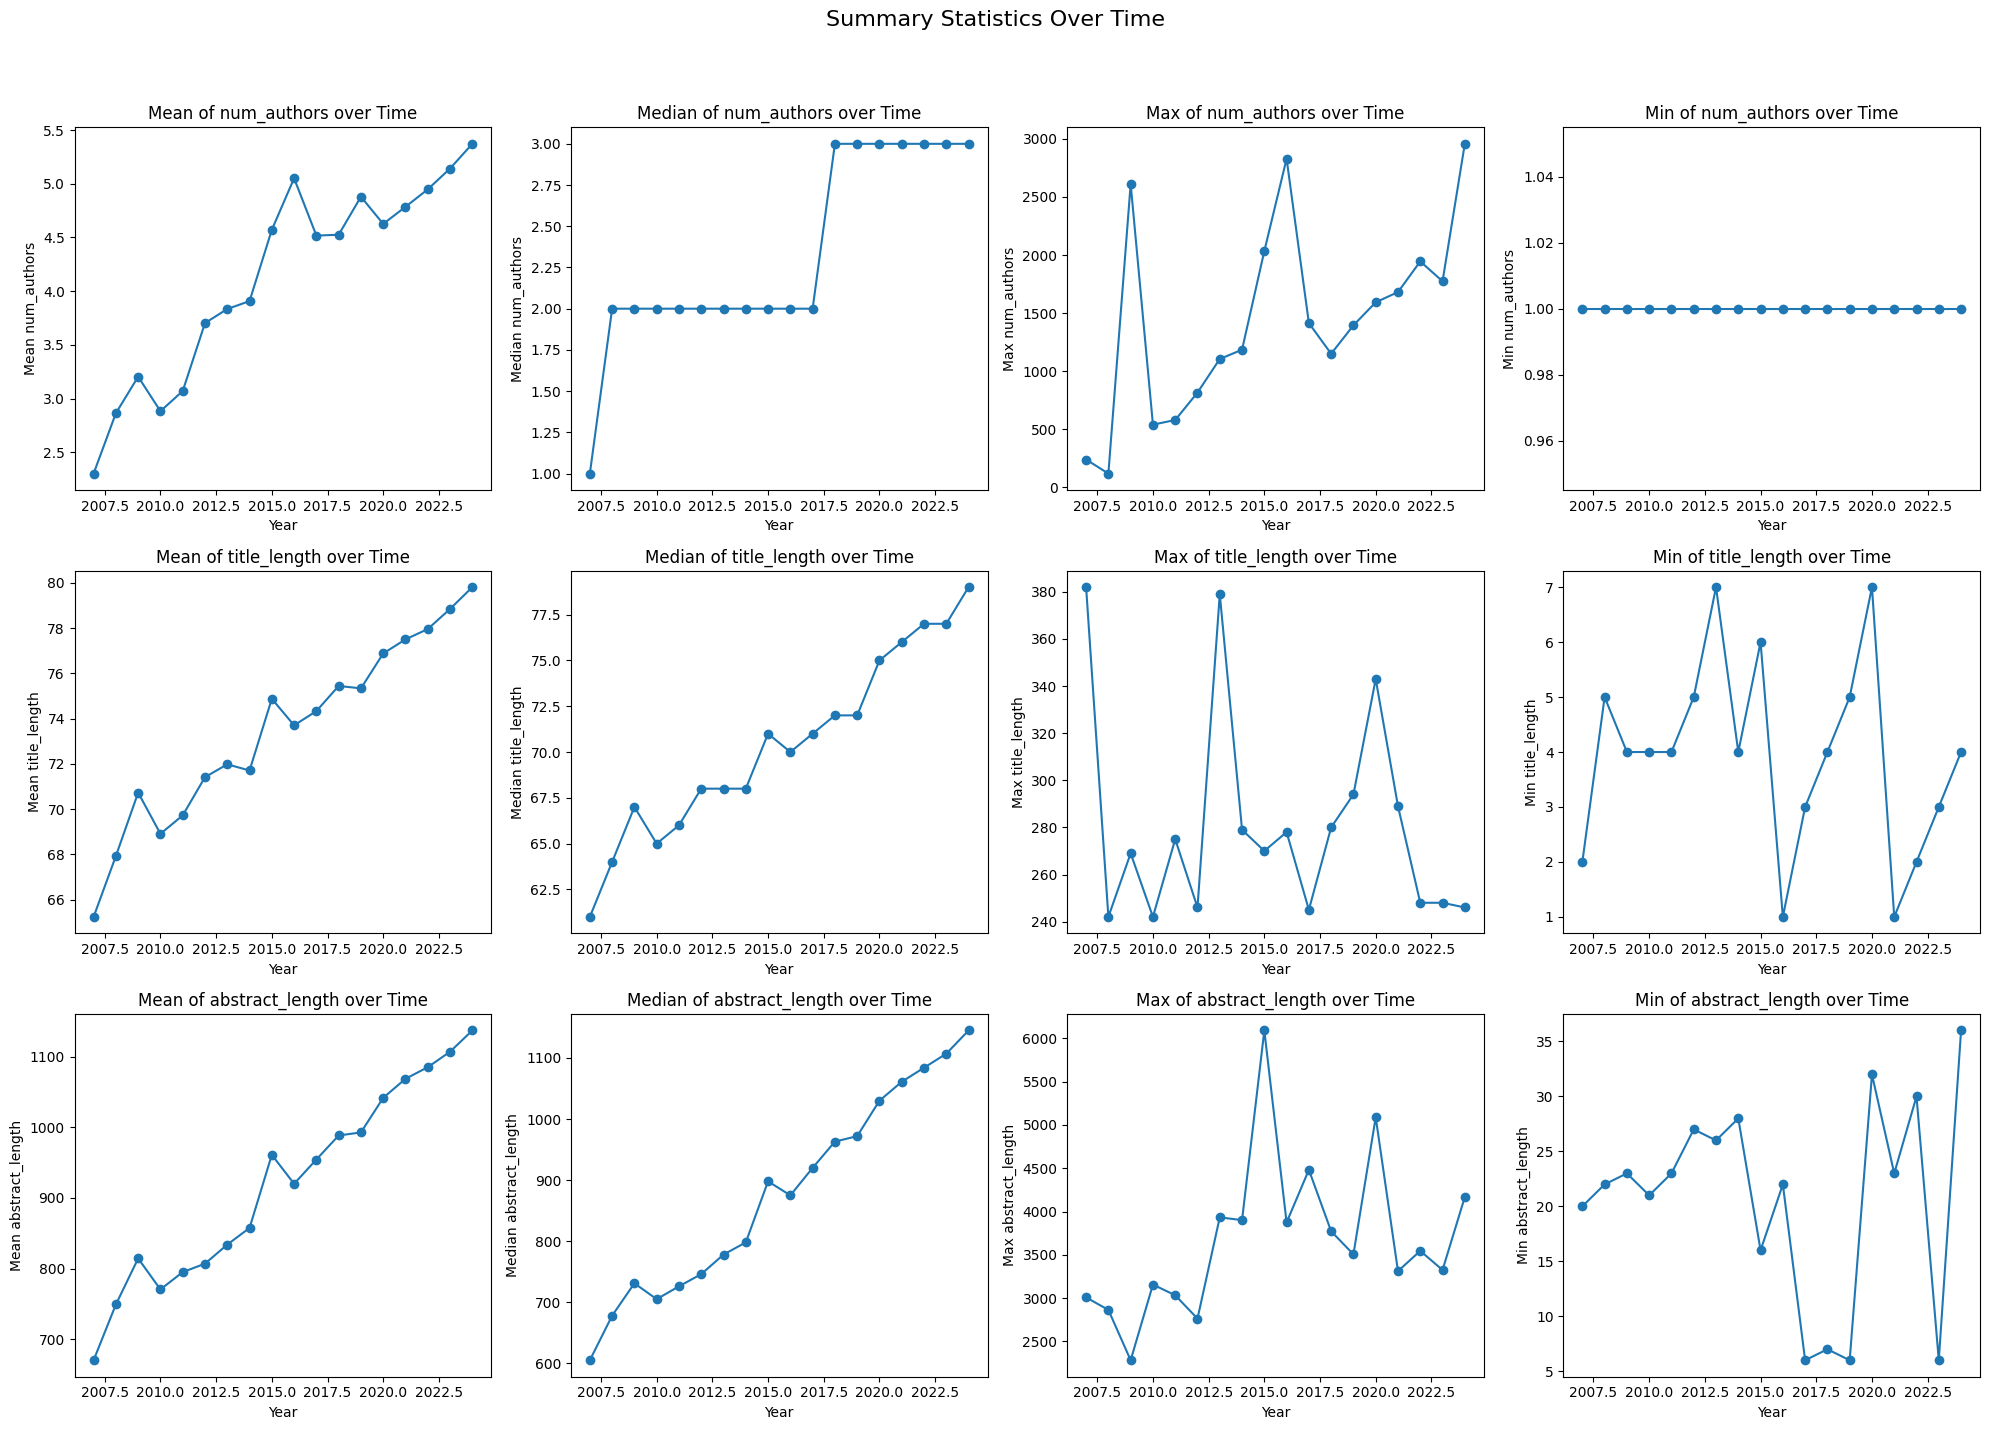

In [ ]:
import matplotlib.pyplot as plt

summary_stats = df.groupby('year').agg({'num_authors': ['mean', 'median', 'max', 'min'],
                                        'title_length': ['mean', 'median', 'max', 'min'],
                                        'abstract_length': ['mean', 'median', 'max', 'min']})

# Plotting
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # Adjust figsize as needed
fig.suptitle("Summary Statistics Over Time", fontsize=16)

columns_to_plot = ['num_authors', 'title_length', 'abstract_length']
stats_to_plot = ['mean', 'median', 'max', 'min']

for i, col in enumerate(columns_to_plot):
    for j, stat in enumerate(stats_to_plot):
        axes[i, j].plot(summary_stats[col][stat], marker='o')
        axes[i, j].set_title(f'{stat.capitalize()} of {col} over Time')
        axes[i, j].set_xlabel('Year')
        axes[i, j].set_ylabel(f'{stat.capitalize()} {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate title
plt.show()

In [ ]:
df.head()

,title_length,update_date,year,num_authors,title,abstract_length
0,87,2008-11-26,2008,4,Calculation of prompt diphoton production cros...,983
1,40,2008-12-13,2008,1,Sparsity-certifying Graph Decompositions,798
2,83,2008-01-13,2008,1,The evolution of the Earth-Moon system based o...,880
3,89,2007-05-23,2007,1,A determinant of Stirling cycle numbers counts...,248
4,52,2013-10-15,2013,1,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,223
